In [ ]:
!pip install pyro-ppl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 11.7 MB/s eta 0:00:00


In [ ]:
import math
import os
import torch
import pyro
import pyro.distributions as dist
from matplotlib import pyplot
from torch.distributions import constraints
import pandas as pd

from pyro import poutine
from pyro.infer import EnergyDistance, Predictive, SVI, Trace_ELBO
from pyro.infer.autoguide import AutoDiagonalNormal
from pyro.infer.reparam import DiscreteCosineReparam, StableReparam
from pyro.optim import ClippedAdam
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving US Stock Market Dataset.csv to US Stock Market Dataset.csv


In [ ]:
df = pd.read_csv('US Stock Market Dataset.csv', parse_dates=['Date'], dayfirst=True)


Saving US Stock Market Dataset.csv to US Stock Market Dataset (3).csv
DataFrame structure:
<class 'pandas.core.frame.DataFrame'>
Index: 1013 entries, 950 to 14
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         1013 non-null   int64         
 1   Date               1013 non-null   datetime64[ns]
 2   Natural_Gas_Price  1013 non-null   float64       
 3   Natural_Gas_Vol.   1009 non-null   float64       
 4   Crude_oil_Price    1013 non-null   float64       
 5   Crude_oil_Vol.     990 non-null    float64       
 6   Copper_Price       1013 non-null   float64       
 7   Copper_Vol.        976 non-null    float64       
 8   Bitcoin_Price      1013 non-null   object        
 9   Bitcoin_Vol.       1013 non-null   int64         
 10  Platinum_Price     1013 non-null   object        
 11  Platinum_Vol.      636 non-null    float64       
 12  Ethereum_Price     1013 non-null

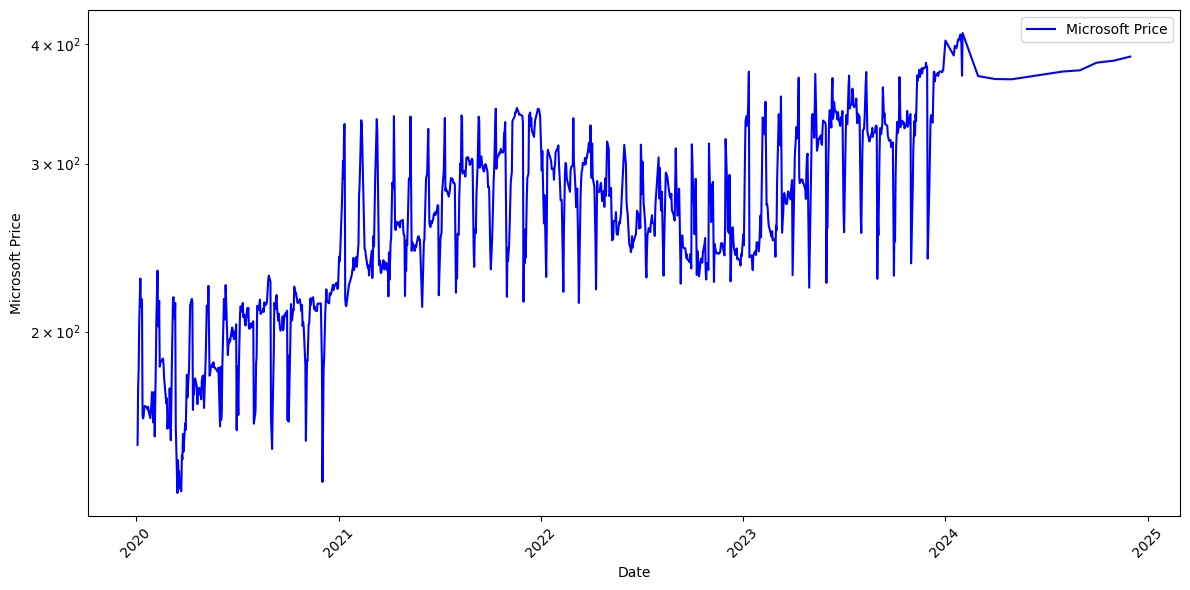

In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt

# Step 1: Upload the dataset
uploaded = files.upload()

# Load the dataset into a DataFrame (CSV file)
df = pd.read_csv('US Stock Market Dataset.csv')  # Ensure the filename matches your uploaded file

# Step 2: Parse the dates
def parse_dates(date):
    try:
        return pd.to_datetime(date, format='%m/%d/%Y')
    except ValueError:
        return pd.to_datetime(date, format='%d-%m-%Y', errors='coerce')

df['Date'] = df['Date'].apply(parse_dates)

# Step 3: Sort the DataFrame by Date
df = df.sort_values(by='Date')

# Step 4: Check the structure of the DataFrame
print("DataFrame structure:")
print(df.info())

# Step 5: Check unique values in Microsoft_Price column
if 'Microsoft_Price' in df.columns:
    print("Unique values in Microsoft_Price:")
    print(df['Microsoft_Price'].unique())
else:
    print("Microsoft_Price column does not exist.")

# Check for invalid dates
print(f"Number of invalid dates: {df['Date'].isna().sum()}")

# Step 6: Convert Microsoft_Price to numeric, coercing errors to NaN
df['Microsoft_Price'] = pd.to_numeric(df['Microsoft_Price'], errors='coerce')

# Step 7: Drop rows where Microsoft_Price is NaN
df = df.dropna(subset=['Microsoft_Price'])

# Ensure we still have data after dropping NaNs
if len(df) == 0:
    print("The dataset is empty after dropping NaN values in Microsoft_Price.")
else:
    # Extract the data for plotting
    dates = df['Date'].to_numpy()
    microsoft_prices = df['Microsoft_Price'].to_numpy()

    # Plot the Microsoft price
    plt.figure(figsize=(12, 6))
    plt.plot(dates, microsoft_prices, label='Microsoft Price', color='blue')
    plt.yscale('log')  # Use log scale if prices vary widely
    plt.ylabel("Microsoft Price")
    plt.xlabel("Date")

    plt.xticks(rotation=45)  # Rotate dates for better visibility
    plt.tight_layout()  # Adjust layout to make room for rotated labels
    plt.legend()
    plt.show()


Saving US Stock Market Dataset.csv to US Stock Market Dataset (8).csv
DataFrame structure:
<class 'pandas.core.frame.DataFrame'>
Index: 1013 entries, 950 to 14
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         1013 non-null   int64         
 1   Date               1013 non-null   datetime64[ns]
 2   Natural_Gas_Price  1013 non-null   float64       
 3   Natural_Gas_Vol.   1009 non-null   float64       
 4   Crude_oil_Price    1013 non-null   float64       
 5   Crude_oil_Vol.     990 non-null    float64       
 6   Copper_Price       1013 non-null   float64       
 7   Copper_Vol.        976 non-null    float64       
 8   Bitcoin_Price      1013 non-null   object        
 9   Bitcoin_Vol.       1013 non-null   int64         
 10  Platinum_Price     1013 non-null   object        
 11  Platinum_Vol.      636 non-null    float64       
 12  Ethereum_Price     1013 non-null

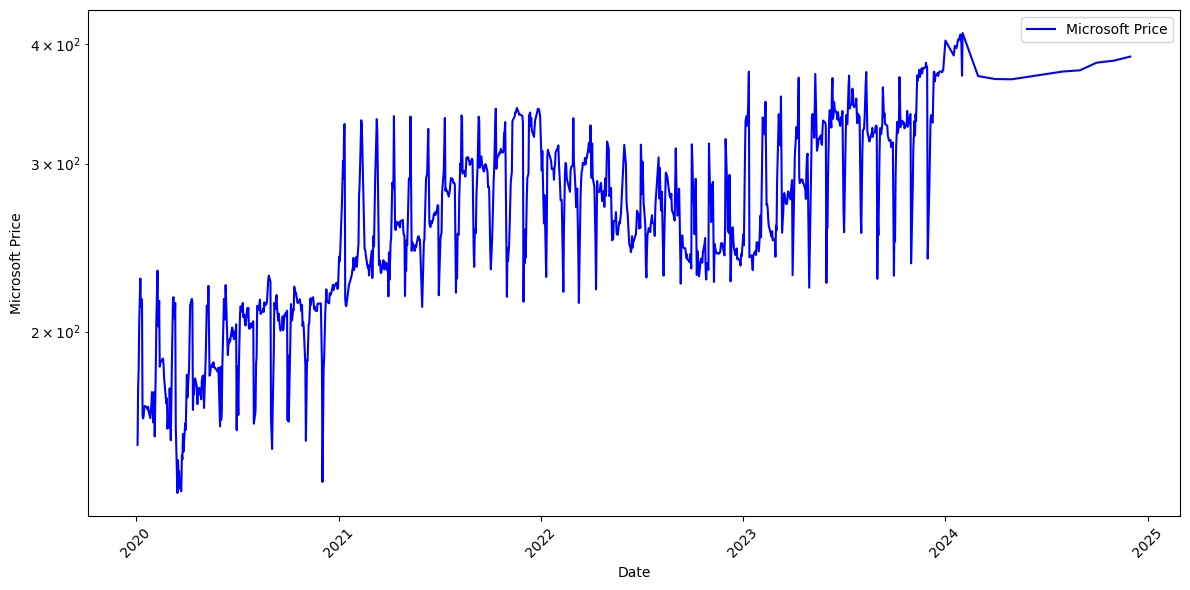

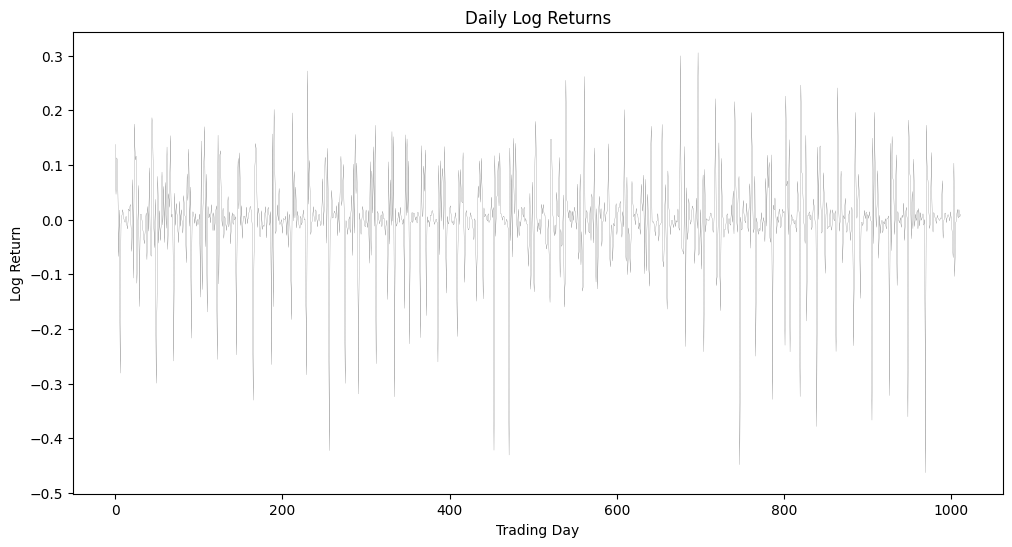

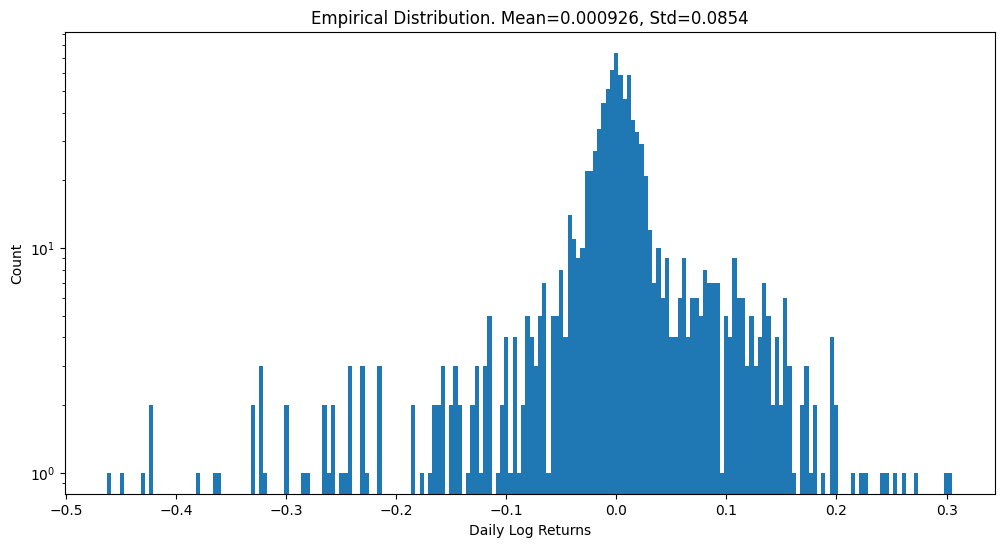

In [ ]:

import pandas as pd
import math
import os
import torch
import pyro
import pyro.distributions as dist
from matplotlib import pyplot as plt
from pyro import poutine
from pyro.infer import EnergyDistance, Predictive, SVI, Trace_ELBO
from pyro.infer.autoguide import AutoDiagonalNormal
from pyro.infer.reparam import DiscreteCosineReparam, StableReparam
from pyro.optim import ClippedAdam

from google.colab import files
uploaded = files.upload()


df = pd.read_csv('US Stock Market Dataset.csv')  # Ensure the filename matches your uploaded file


def parse_dates(date):
    try:
        return pd.to_datetime(date, format='%m/%d/%Y')
    except ValueError:
        return pd.to_datetime(date, format='%d-%m-%Y', errors='coerce')

df['Date'] = df['Date'].apply(parse_dates)


df = df.sort_values(by='Date')


print("DataFrame structure:")
print(df.info())

if 'Microsoft_Price' in df.columns:
    print("Unique values in Microsoft_Price:")
    print(df['Microsoft_Price'].unique())
else:
    print("Microsoft_Price column does not exist.")


print(f"Number of invalid dates: {df['Date'].isna().sum()}")

# Convert Microsoft_Price to numeric, coercing errors to NaN
df['Microsoft_Price'] = pd.to_numeric(df['Microsoft_Price'], errors='coerce')

#  Drop rows where Microsoft_Price is NaN
df = df.dropna(subset=['Microsoft_Price'])

# Ensure we still have data after dropping NaNs
if len(df) == 0:
    print("The dataset is empty after dropping NaN values in Microsoft_Price.")
else:
    # Extract the data for plotting
    dates = df['Date'].to_numpy()
    microsoft_prices = df['Microsoft_Price'].to_numpy()

    # Plot the Microsoft price
    plt.figure(figsize=(12, 6))
    plt.plot(dates, microsoft_prices, label='Microsoft Price', color='blue')
    plt.yscale('log')  # Use log scale if prices vary widely
    plt.ylabel("Microsoft Price")
    plt.xlabel("Date")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend()
    plt.show()


    x = torch.tensor(microsoft_prices).float()

    # Calculate daily log returns
    r = (x[1:] / x[:-1]).log()

    # Plot daily log returns
    plt.figure(figsize=(12, 6))
    plt.plot(r.numpy(), "k", lw=0.1)
    plt.title("Daily Log Returns")
    plt.xlabel("Trading Day")
    plt.ylabel("Log Return")

    # Histogram of daily log returns
    plt.figure(figsize=(12, 6))
    plt.hist(r.numpy(), bins=200)
    plt.yscale('log')
    plt.ylabel("Count")
    plt.xlabel("Daily Log Returns")
    plt.title("Empirical Distribution. Mean={:0.3g}, Std={:0.3g}".format(r.mean(), r.std()))
    plt.show()



In [ ]:

    def model():
        stability = pyro.param("stability", torch.tensor(1.9), constraint=dist.constraints.interval(0, 2))
        skew = 0.
        scale = pyro.param("scale", torch.tensor(0.1), constraint=dist.constraints.positive)
        loc = pyro.param("loc", torch.tensor(0.))
        with pyro.plate("data", len(r)):
            return pyro.sample("r", dist.Stable(stability, skew, scale, loc), obs=r)

    pyro.clear_param_store()
    pyro.set_rng_seed(1234567890)
    num_steps = 201
    optim = ClippedAdam({"lr": 0.1, "lrd": 0.1 ** (1 / num_steps)})
    svi = SVI(model, lambda: None, optim, EnergyDistance())
    losses = []
    for step in range(num_steps):
        loss = svi.step()
        losses.append(loss)
        if step % 20 == 0:
            print("step {} loss = {}".format(step, loss))

step 0 loss = 2.078558921813965
step 20 loss = 1.9374523162841797
step 40 loss = 2.0063748359680176
step 60 loss = 1.876874566078186
step 80 loss = 1.943397045135498
step 100 loss = 1.9085063934326172
step 120 loss = 1.8646650314331055
step 140 loss = 1.9577136039733887
step 160 loss = 1.928939700126648
step 180 loss = 1.8955960273742676
step 200 loss = 1.951459288597107


--------------------


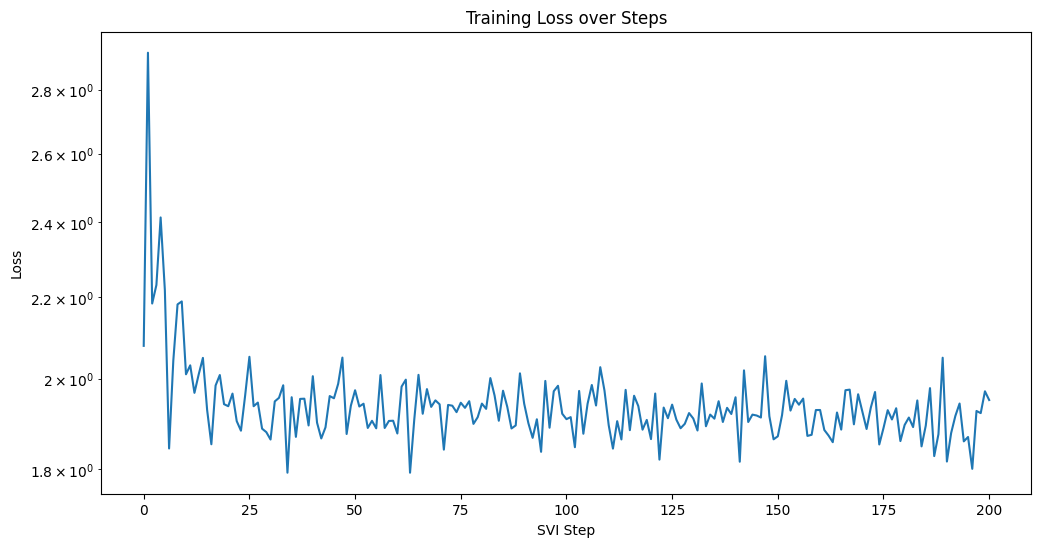

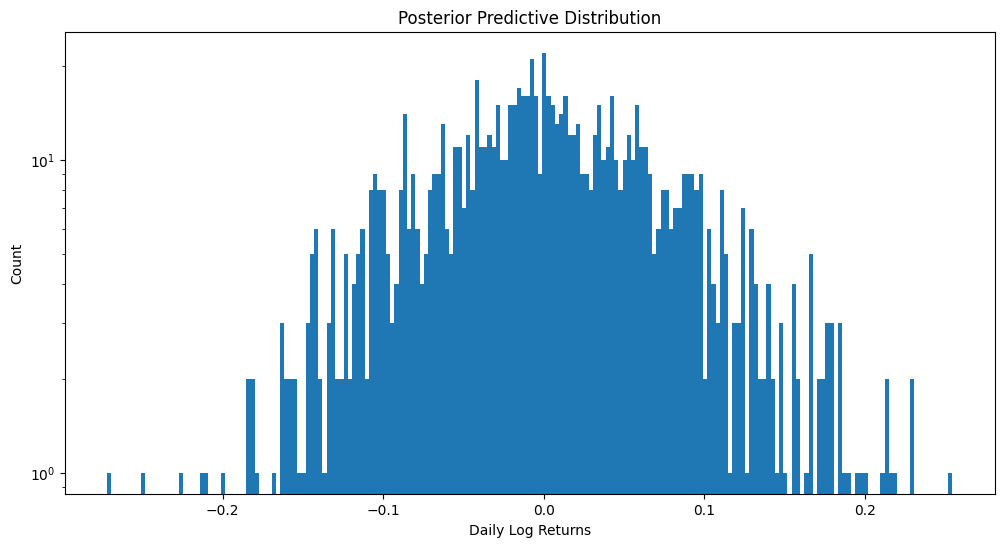

In [ ]:
    print("-" * 20)

    plt.figure(figsize=(12, 6))
    plt.plot(losses)
    plt.yscale("log")
    plt.ylabel("Loss")
    plt.xlabel("SVI Step")
    plt.title("Training Loss over Steps")
    plt.show()


    samples = poutine.uncondition(model)().detach()
    plt.figure(figsize=(12, 6))
    plt.hist(samples.numpy(), bins=200)
    plt.yscale("log")
    plt.xlabel("Daily Log Returns")
    plt.ylabel("Count")
    plt.title("Posterior Predictive Distribution")
    plt.show()

In [ ]:
    def model_with_data(data):
        h_0 = pyro.sample("h_0", dist.Normal(0, 1)).unsqueeze(-1)
        sigma = pyro.sample("sigma", dist.LogNormal(0, 1)).unsqueeze(-1)
        v = pyro.sample("v", dist.Normal(0, 1).expand(data.shape).to_event(1))
        log_h = pyro.deterministic("log_h", h_0 + sigma * v.cumsum(dim=-1))
        sqrt_h = log_h.mul(0.5).exp().clamp(min=1e-8, max=1e8)

        r_loc = pyro.sample("r_loc", dist.Normal(0, 1e-2)).unsqueeze(-1)
        r_skew = pyro.sample("r_skew", dist.Uniform(-1, 1)).unsqueeze(-1)
        r_stability = pyro.sample("r_stability", dist.Uniform(0, 2)).unsqueeze(-1)
        pyro.sample("r", dist.Stable(r_stability, r_skew, sqrt_h, r_loc * sqrt_h).to_event(1), obs=data)

    reparam_model = poutine.reparam(model_with_data, {"v": DiscreteCosineReparam(), "r": StableReparam()})

    pyro.clear_param_store()
    pyro.set_rng_seed(1234567890)

    def fit_model(model):
        num_steps = 3001
        optim = ClippedAdam({"lr": 0.05, "betas": (0.9, 0.99), "lrd": 0.1 ** (1 / num_steps)})
        guide = AutoDiagonalNormal(model)
        svi = SVI(model, guide, optim, Trace_ELBO())
        losses = []
        stats = []
        for step in range(num_steps):
            loss = svi.step(r) / len(r)
            losses.append(loss)
            stats.append(guide.quantiles([0.325, 0.675]).items())
            if step % 200 == 0:
                median = guide.median()
                print("step {} loss = {:0.6g}".format(step, loss))

        return guide, losses, stats


step 0 loss = 12.5043
step 200 loss = -0.813613
step 400 loss = -0.912583
step 600 loss = -0.958843
step 800 loss = -1.00853
step 1000 loss = -1.04688
step 1200 loss = -1.02679
step 1400 loss = -1.02328
step 1600 loss = -1.09089
step 1800 loss = -1.11422
step 2000 loss = -1.1107
step 2200 loss = -1.13161
step 2400 loss = -1.03855
step 2600 loss = -1.07404
step 2800 loss = -1.16895
step 3000 loss = -1.08631
--------------------
h_0 = 0.3327 ± 0.02038
r_loc = 0.01165 ± 0.004607
r_skew = -0.0001455 ± 0.00147
r_stability = 1.896 ± 0.007729
sigma = 1.034 ± 0.002977


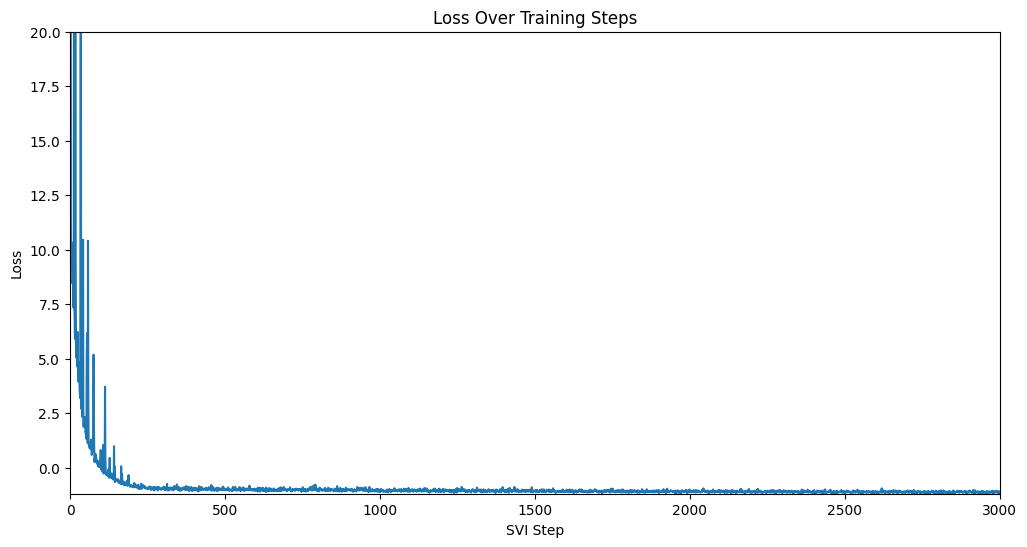

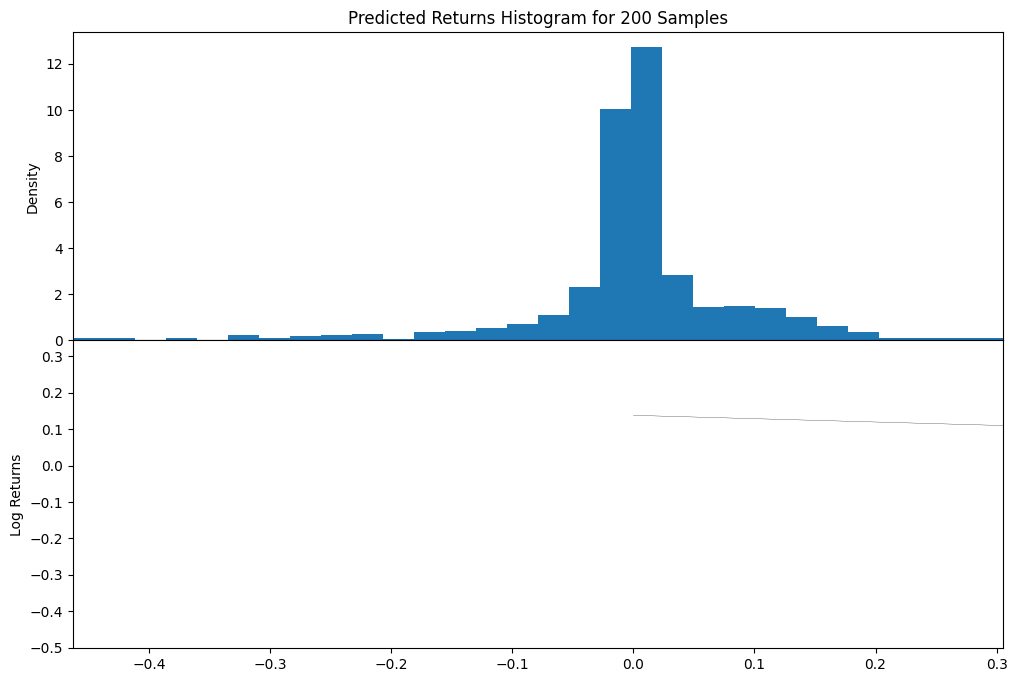

In [ ]:

guide, losses, stats = fit_model(reparam_model)

print("-" * 20)
for name, (lb, ub) in sorted(stats[-1]):
    if lb.numel() == 1:
        lb = lb.squeeze().item()
        ub = ub.squeeze().item()
        print("{} = {:0.4g} ± {:0.4g}".format(name, (lb + ub) / 2, (ub - lb) / 2))


plt.figure(figsize=(12, 6))
plt.plot(losses)
plt.ylabel("Loss")
plt.xlabel("SVI Step")
plt.xlim(0, len(losses))
plt.ylim(min(losses), 20)
plt.title("Loss Over Training Steps")
plt.show()

fig, axes = plt.subplots(2, figsize=(12, 8), sharex=True)
plt.subplots_adjust(hspace=0)
axes[1].plot(r.numpy(), "k", lw=0.2)
axes[1].set_ylabel("Log Returns")
axes[1].set_xlim(0, len(r))


num_samples = 200
with torch.no_grad():
    pred = Predictive(reparam_model, guide=guide, num_samples=num_samples, parallel=True)(r)

    predicted_returns = pred["r"]

    flattened_returns = predicted_returns.reshape(-1)

axes[0].hist(flattened_returns.numpy(), bins=30, density=True)
axes[0].set_ylabel("Density")
axes[0].set_title(f"Predicted Returns Histogram for {num_samples} Samples")
axes[0].set_xlim(flattened_returns.min().item(), flattened_returns.max().item())


plt.show()
